# HY4: Pollutant Correlation

**Hypothesis:** PM₂.₅, PM₁₀, and NO₂ are strongly correlated


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [9]:
# Load data
df = pd.read_csv('../cleaned_data/analysis_ready.csv')
pollutants = ['mean_value_PM25', 'mean_value_PM10', 'mean_value_NO2']
df = df[pollutants].dropna()

print(f"Data shape: {df.shape}")
df.head()

Data shape: (112, 3)


,mean_value_PM25,mean_value_PM10,mean_value_NO2
42,3.624,10.226,0.356
43,3.624,10.226,0.356
44,3.624,10.226,0.356
45,3.624,10.226,0.356
46,3.624,10.226,0.356


In [10]:
# Correlation analysis
corr = df.corr()
print("Correlation Matrix:")
print(corr)

# Test hypothesis
r1, p1 = pearsonr(df['mean_value_PM25'], df['mean_value_PM10'])
r2, p2 = pearsonr(df['mean_value_PM25'], df['mean_value_NO2'])

print(f"\nPM₂.₅ - PM₁₀: r = {r1:.3f}, p = {p1:.4f}")
print(f"PM₂.₅ - NO₂:  r = {r2:.3f}, p = {p2:.4f}")

if r1 > 0.7 and r2 > 0.6:
    print("\n✓ Hypothesis SUPPORTED: Strong correlations found")
else:
    print("\n✗ Hypothesis NOT fully supported")

Correlation Matrix:
                 mean_value_PM25  mean_value_PM10  mean_value_NO2
mean_value_PM25            1.000            0.812          -0.366
mean_value_PM10            0.812            1.000          -0.361
mean_value_NO2            -0.366           -0.361           1.000

PM₂.₅ - PM₁₀: r = 0.812, p = 0.0000
PM₂.₅ - NO₂:  r = -0.366, p = 0.0001

✗ Hypothesis NOT fully supported


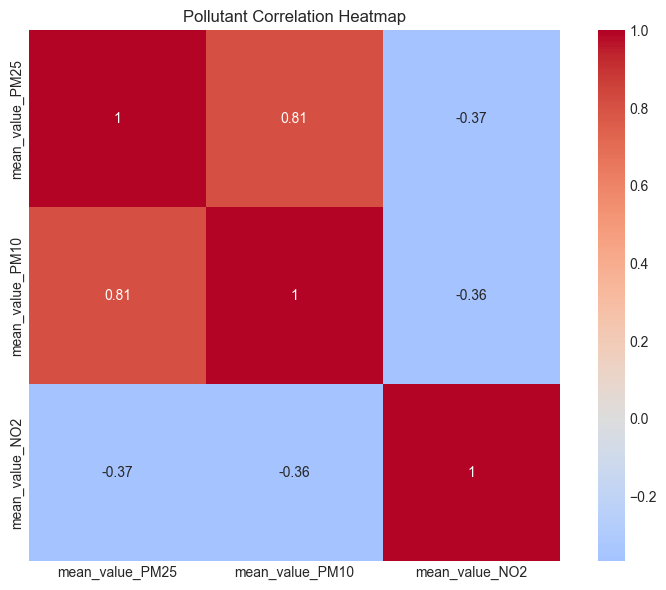

In [11]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Pollutant Correlation Heatmap')
plt.tight_layout()
plt.savefig('../visualizations/HY4_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

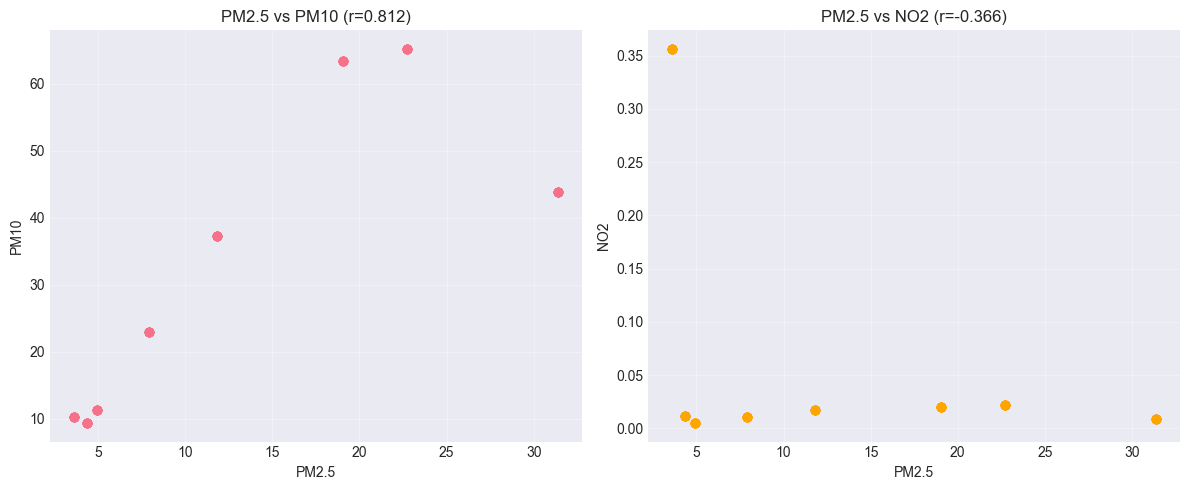

In [14]:
# Scatter plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(df['mean_value_PM25'], df['mean_value_PM10'], alpha=0.5)
axes[0].set_xlabel('PM2.5')
axes[0].set_ylabel('PM10')
axes[0].set_title(f'PM2.5 vs PM10 (r={r1:.3f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['mean_value_PM25'], df['mean_value_NO2'], alpha=0.5, color='orange')
axes[1].set_xlabel('PM2.5')
axes[1].set_ylabel('NO2')
axes[1].set_title(f'PM2.5 vs NO2 (r={r2:.3f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/HY4_scatter.png', dpi=300, bbox_inches='tight')
plt.show()